In [1]:
import alpdesign as alp
from alpdesign.seq import *
from alpdesign.utils import *
import jax 
from jax_unirep import get_reps
import haiku as hk

In [2]:
print(forward_seqprop)

Transformed(init=<function without_state.<locals>.init_fn at 0x7f21e440e4d0>, apply=<function without_state.<locals>.apply_fn at 0x7f21e440e560>)


In [3]:
target_char = ['G','I','G','A','V','L','K','V','L','T','T','G','L','P','A','L','I','S','W','I','K','R','K','R','Q','Q']
oh_vec = encode_seq(target_char)
target_seq = ['GIGAVLKVLTTGLPALISWIKRKRQQ']
target_rep = get_reps(target_seq)[0]
key = jax.random.PRNGKey(0)
key, logits_key, r_key, b_key = jax.random.split(key, num=4)

batch_size = 8
bag_num = 2
logits = jax.random.normal(logits_key, shape=(jnp.shape(oh_vec)))
b_logits = jax.random.normal(logits_key, shape=(batch_size,*jnp.shape(oh_vec)))
#batch_keys = jax.random.split(key, num=batch_size)
#r = jax.random.normal(r_key)
#b = jax.random.normal(b_key)

params = forward_seqprop.init(key, logits)
#forward_seqprop = hk.transform(forward_seqprop)
beam_loss_traces, beam_loss, beam_seqs = pso_train(key, target_rep, b_logits, params, train_seqprop_adam, batch_size, bag_num)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


In [8]:
print(target_rep)

[[ 0.02226657  0.00063971 -0.00508607 ...  0.09715213  0.08579674
   0.02912818]]


(4, 40)


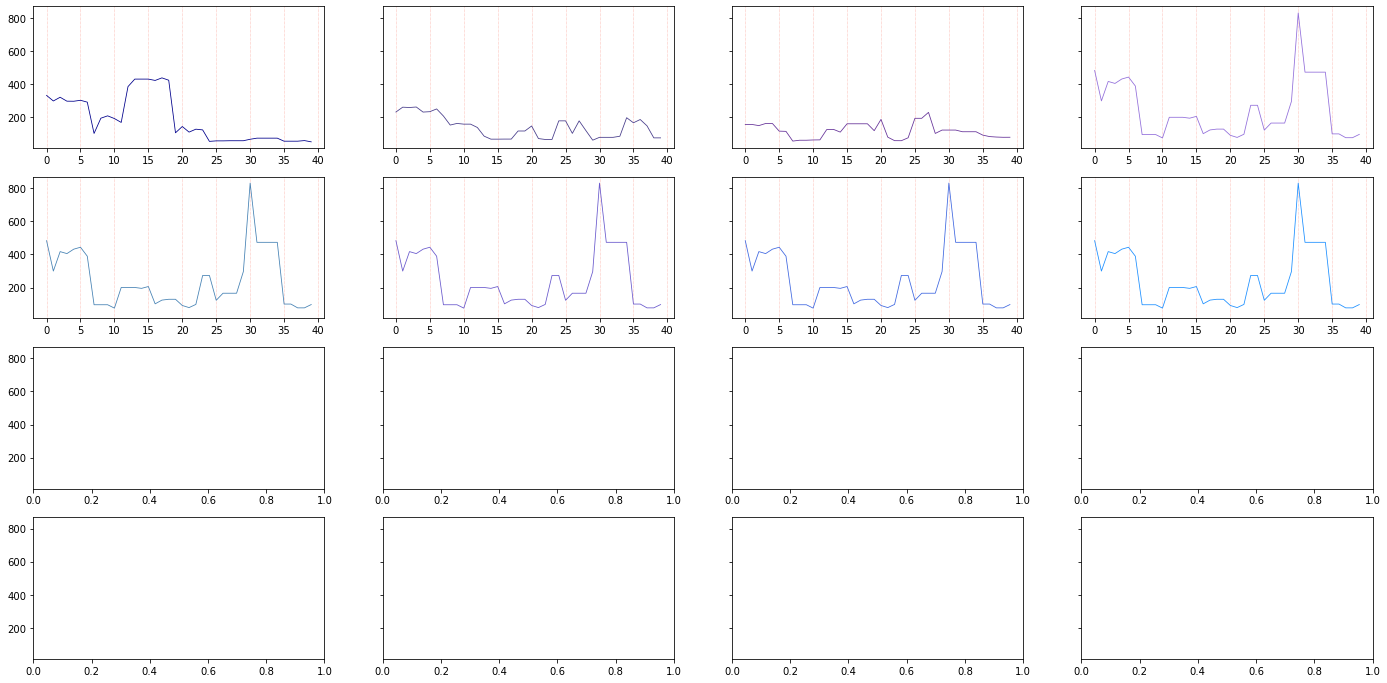

In [7]:
import matplotlib.pyplot as plt
training_steps = 20
bag_num=2
traces = beam_loss_traces[0]
for i in range(1,bag_num):
    traces = jnp.concatenate((traces, beam_loss_traces[i]), axis=1)
print(traces.shape)
loss_trace = jnp.array(traces)
plt.rcParams["figure.figsize"] = (24,12)
fig, axs = plt.subplots(4, 4, sharey=True)
colors = ['darkblue', 'darkslateblue', 'rebeccapurple', 'mediumpurple', 
          'steelblue', 'slateblue', 'royalblue', 'dodgerblue',
          'darkslategrey', 'teal', 'cadetblue', 'slategray',
          'maroon', 'saddlebrown', 'sienna', 'chocolate']
for i in range(8):
    #plt.plot(loss_trace[i,:])
    row = i // 4
    col = i % 4
    axs[row, col].plot(loss_trace[i,:], c=colors[i], linewidth=0.8)
    axs[row, col].grid(axis='x', color='salmon', linestyle='dotted', linewidth=0.5)
#plt.savefig('loss.png', dpi=800)